In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE437 Project/Living close to an university on academic performance.csv')

In [ ]:
df.head(5)

,Timestamp,Email Address,Provide Your Name,1. What's your current age? ( Enter age between 18 and 28.),2. How far do you live from the university?,3. How do you commute to the university?,4. What is your academic CGPA range?,5. How many hours per week do you dedicate to studying (outside class hours)?,"6. How often do you study on campus (e.g., in the library, study rooms)?",7. What type of accommodation do you live in?,8. How does your living distance affect your punctuality for classes?,9. Is the long distance disturbing your sleeping routine?,10. State your academic performance
0,12/31/2024 3:54:12,samir.yeasir.emon@g.bracu.ac.bd,Samir Yeasir Emon,23,More than 10 km,Public Transport,3.7>,Less than 5,Never,Family home,Frequently late,Yes,Good
1,12/31/2024 9:47:20,abhishek.mondal.abir@g.bracu.ac.bd,Abhishek Mondal Abir,21,1–5 km,Public Transport,3.3 - 3.7,More than 15,Few times a Week,Family home,Always on time,Sometimes,Moderate
2,12/31/2024 9:47:28,abrar.jahin.intisar@g.bracu.ac.bd,Ayman,21,6–10 km,Public Transport,3.3 - 3.7,11 -15,Never,Family home,Occasionally late,Sometimes,Bad
3,12/31/2024 9:47:30,saima.islam.shamonti@g.bracu.ac.bd,Saima Islam Shamonti,21,1–5 km,Public Transport,3.7>,11 -15,Few times a Week,Family home,Always on time,Yes,Moderate
4,12/31/2024 9:47:54,marwa.binti.bhuiyan@g.bracu.ac.bd,Marwa Binti Bhuiyan,20,Less than 1 km,Walking,3.7>,Less than 5,Once a Week,Family home,Always on time,No,Moderate


In [ ]:
columns_to_drop = ['Timestamp','Email Address','Provide Your Name']
main = df.copy()
main.drop(columns_to_drop, axis=1, inplace=True)

main.head()

,1. What's your current age? ( Enter age between 18 and 28.),2. How far do you live from the university?,3. How do you commute to the university?,4. What is your academic CGPA range?,5. How many hours per week do you dedicate to studying (outside class hours)?,"6. How often do you study on campus (e.g., in the library, study rooms)?",7. What type of accommodation do you live in?,8. How does your living distance affect your punctuality for classes?,9. Is the long distance disturbing your sleeping routine?,10. State your academic performance
0,23,More than 10 km,Public Transport,3.7>,Less than 5,Never,Family home,Frequently late,Yes,Good
1,21,1–5 km,Public Transport,3.3 - 3.7,More than 15,Few times a Week,Family home,Always on time,Sometimes,Moderate
2,21,6–10 km,Public Transport,3.3 - 3.7,11 -15,Never,Family home,Occasionally late,Sometimes,Bad
3,21,1–5 km,Public Transport,3.7>,11 -15,Few times a Week,Family home,Always on time,Yes,Moderate
4,20,Less than 1 km,Walking,3.7>,Less than 5,Once a Week,Family home,Always on time,No,Moderate


In [ ]:
df.describe()

,1. What's your current age? ( Enter age between 18 and 28.)
count,134.000000
mean,21.910448
std,1.601046
min,18.000000
25%,21.000000
50%,22.000000
75%,23.000000
max,25.000000


In [ ]:
main .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 10 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   1. What's your current age? ( Enter age between 18 and 28.)                     134 non-null    int64 
 1   2. How far do you live from the university?                                     134 non-null    object
 2   3. How do you commute to the university?                                        134 non-null    object
 3   4. What is your academic CGPA range?                                            134 non-null    object
 4   5. How many hours per week do you dedicate to studying (outside class hours)?   134 non-null    object
 5   6. How often do you study on campus (e.g., in the library, study rooms)?        134 non-null    object
 6   7. What type of accommodat

In [ ]:
main.shape

(134, 10)

In [ ]:
main.isnull().sum()

,0
1. What's your current age? ( Enter age between 18 and 28.),0
2. How far do you live from the university?,0
3. How do you commute to the university?,0
4. What is your academic CGPA range?,0
5. How many hours per week do you dedicate to studying (outside class hours)?,0
"6. How often do you study on campus (e.g., in the library, study rooms)?",0
7. What type of accommodation do you live in?,0
8. How does your living distance affect your punctuality for classes?,1
9. Is the long distance disturbing your sleeping routine?,0
10. State your academic performance,0


In [ ]:
total_duplicates = main.duplicated().sum()
print(f"Total number of duplicate rows: {total_duplicates}")

Total number of duplicate rows: 0


In [ ]:
unique_counts = main.nunique()

categorical_features = unique_counts[unique_counts <= 10].index
quantitative_features = unique_counts[unique_counts > 10].index

nc = len(categorical_features)
qc = len(quantitative_features)

print(f"Categorical Features: {nc}")
print(categorical_features)

print(f"\nQuantitative Features: {qc}")
print(quantitative_features)

Categorical Features: 10
Index(['1. What's your current age? ( Enter age between 18 and 28.) ',
       '2. How far do you live from the university? ',
       '3. How do you commute to the university? ',
       '4. What is your academic CGPA range?',
       '5. How many hours per week do you dedicate to studying (outside class hours)? ',
       '6. How often do you study on campus (e.g., in the library, study rooms)? ',
       '7. What type of accommodation do you live in?',
       '8. How does your living distance affect your punctuality for classes?',
       '9. Is the long distance disturbing your sleeping routine? ',
       '10. State your academic performance'],
      dtype='object')

Quantitative Features: 0
Index([], dtype='object')


In [ ]:

for x in range(len(categorical_features)):
    unique1 = main[categorical_features[x]].nunique()
    print(f"Number of unique values in {categorical_features[x]} column: {unique1}")
    unique2= main[categorical_features[x]].unique()
    print(f"Unique values in {categorical_features[x]} : {unique2}")
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")



Number of unique values in 1. What's your current age? ( Enter age between 18 and 28.)  column: 8
Unique values in 1. What's your current age? ( Enter age between 18 and 28.)  : [23 21 20 22 19 18 24 25]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Number of unique values in 2. How far do you live from the university?  column: 4
Unique values in 2. How far do you live from the university?  : ['More than 10 km' '1–5 km' '6–10 km' 'Less than 1 km']
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Number of unique values in 3. How do you commute to the university?  column: 4
Unique values in 3. How do you commute to the university?  : ['Public Transport' 'Walking' 'Personal Vehicle' 'Others']
-----------------------------------------------------------------------------

In [ ]:
print(main.columns.tolist())


["1. What's your current age? ( Enter age between 18 and 28.) ", '2. How far do you live from the university? ', '3. How do you commute to the university? ', '4. What is your academic CGPA range?', '5. How many hours per week do you dedicate to studying (outside class hours)? ', '6. How often do you study on campus (e.g., in the library, study rooms)? ', '7. What type of accommodation do you live in?', '8. How does your living distance affect your punctuality for classes?', '9. Is the long distance disturbing your sleeping routine? ', '10. State your academic performance']


In [ ]:
main1 = main.copy()

main1['2. How far do you live from the university? '] = main['2. How far do you live from the university? '].map({
    'More than 10 km': 4,
    '1–5 km': 3,
    '6–10 km': 2,
    'Less than 1 km': 1
})

main1['3. How do you commute to the university? '] = main['3. How do you commute to the university? '].map({
    'Public Transport': 3,
    'Walking': 4,
    'Personal Vehicle': 2,
    'Others': 1
})

main1['4. What is your academic CGPA range?'] = main['4. What is your academic CGPA range?'].map({
    '3.7>': 4,
    '3.3 - 3.7': 3,
    '<3.0': 1,
    '3.0 - 3.3': 2
})

main1['5. How many hours per week do you dedicate to studying (outside class hours)? '] = main['5. How many hours per week do you dedicate to studying (outside class hours)? '].map({
    'Less than 5': 1,
    'More than 15': 4,
    '11 -15': 3,
    '5 - 10': 2
})

main1['6. How often do you study on campus (e.g., in the library, study rooms)? '] = main['6. How often do you study on campus (e.g., in the library, study rooms)? '].map({
    'Never': 1,
    'Few times a Week': 2,
    'Once a Week': 3,
    'Daily': 4
})

main1['7. What type of accommodation do you live in?'] = main['7. What type of accommodation do you live in?'].map({
    'Family home': 1,
    'Off-campus shared apartment': 2,
    'Off-campus private residence': 3
})

main1['8. How does your living distance affect your punctuality for classes?'] = main['8. How does your living distance affect your punctuality for classes?'].map({
    'Frequently late': 1,
    'Always on time': 4,
    'Occasionally late': 2,
    'Often on time': 3,
})

main1['9. Is the long distance disturbing your sleeping routine? '] = main['9. Is the long distance disturbing your sleeping routine? '].map({
    'Yes': 1,
    'Sometimes': 2,
    'No': 3
})

main1['10. State your academic performance'] = main['10. State your academic performance'].map({
    'Good': 3,
    'Moderate': 2,
    'Bad': 1
})




In [ ]:
main1.head()

,1. What's your current age? ( Enter age between 18 and 28.),2. How far do you live from the university?,3. How do you commute to the university?,4. What is your academic CGPA range?,5. How many hours per week do you dedicate to studying (outside class hours)?,"6. How often do you study on campus (e.g., in the library, study rooms)?",7. What type of accommodation do you live in?,8. How does your living distance affect your punctuality for classes?,9. Is the long distance disturbing your sleeping routine?,10. State your academic performance
0,23,4,3,4,1,1,1,1.0,1,3
1,21,3,3,3,4,2,1,4.0,2,2
2,21,2,3,3,3,1,1,2.0,2,1
3,21,3,3,4,3,2,1,4.0,1,2
4,20,1,4,4,1,3,1,4.0,3,2


In [ ]:
nan_counts = main1.isna().sum()
print(nan_counts)


1. What's your current age? ( Enter age between 18 and 28.)                       0
2. How far do you live from the university?                                       0
3. How do you commute to the university?                                          0
4. What is your academic CGPA range?                                              0
5. How many hours per week do you dedicate to studying (outside class hours)?     0
6. How often do you study on campus (e.g., in the library, study rooms)?          0
7. What type of accommodation do you live in?                                     0
8. How does your living distance affect your punctuality for classes?             1
9. Is the long distance disturbing your sleeping routine?                         0
10. State your academic performance                                               0
dtype: int64


In [ ]:
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
main1['8. How does your living distance affect your punctuality for classes?'] = impute.fit_transform(main1[['8. How does your living distance affect your punctuality for classes?']])


nan_counts = main1.isna().sum()
print(nan_counts)


main1['8. How does your living distance affect your punctuality for classes?'] = main1['8. How does your living distance affect your punctuality for classes?'].astype(int)


1. What's your current age? ( Enter age between 18 and 28.)                       0
2. How far do you live from the university?                                       0
3. How do you commute to the university?                                          0
4. What is your academic CGPA range?                                              0
5. How many hours per week do you dedicate to studying (outside class hours)?     0
6. How often do you study on campus (e.g., in the library, study rooms)?          0
7. What type of accommodation do you live in?                                     0
8. How does your living distance affect your punctuality for classes?             0
9. Is the long distance disturbing your sleeping routine?                         0
10. State your academic performance                                               0
dtype: int64


In [ ]:
main1.head()

,1. What's your current age? ( Enter age between 18 and 28.),2. How far do you live from the university?,3. How do you commute to the university?,4. What is your academic CGPA range?,5. How many hours per week do you dedicate to studying (outside class hours)?,"6. How often do you study on campus (e.g., in the library, study rooms)?",7. What type of accommodation do you live in?,8. How does your living distance affect your punctuality for classes?,9. Is the long distance disturbing your sleeping routine?,10. State your academic performance
0,23,4,3,4,1,1,1,1,1,3
1,21,3,3,3,4,2,1,4,2,2
2,21,2,3,3,3,1,1,2,2,1
3,21,3,3,4,3,2,1,4,1,2
4,20,1,4,4,1,3,1,4,3,2


In [ ]:
main1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 10 columns):
 #   Column                                                                          Non-Null Count  Dtype
---  ------                                                                          --------------  -----
 0   1. What's your current age? ( Enter age between 18 and 28.)                     134 non-null    int64
 1   2. How far do you live from the university?                                     134 non-null    int64
 2   3. How do you commute to the university?                                        134 non-null    int64
 3   4. What is your academic CGPA range?                                            134 non-null    int64
 4   5. How many hours per week do you dedicate to studying (outside class hours)?   134 non-null    int64
 5   6. How often do you study on campus (e.g., in the library, study rooms)?        134 non-null    int64
 6   7. What type of accommodation do y

In [ ]:
# Calculate descriptive statistics for independent and dependent variables
dependent_column = "10. State your academic performance"
independent_column = "2. How far do you live from the university? "

# Calculate statistics
stats_summary = {
    "Mean": [main1[independent_column].mean(), main1[dependent_column].mean()],
    "Variance": [main1[independent_column].var(), main1[dependent_column].var()],
    "Standard Deviation": [main1[independent_column].std(), main1[dependent_column].std()],
    "N of Items": [main1[independent_column].count(), main1[dependent_column].count()]
}

# Create a DataFrame for the summary
summary_df = pd.DataFrame(stats_summary, index=["Distance from University", "Academic Performance"])

# Display the summary
print(summary_df)


                              Mean  Variance  Standard Deviation  N of Items
Distance from University  2.634328  1.241219            1.114100         134
Academic Performance      2.037313  0.336943            0.580468         134


In [ ]:
main1.describe()

,1. What's your current age? ( Enter age between 18 and 28.),2. How far do you live from the university?,3. How do you commute to the university?,4. What is your academic CGPA range?,5. How many hours per week do you dedicate to studying (outside class hours)?,"6. How often do you study on campus (e.g., in the library, study rooms)?",7. What type of accommodation do you live in?,8. How does your living distance affect your punctuality for classes?,9. Is the long distance disturbing your sleeping routine?,10. State your academic performance
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,21.910448,2.634328,3.007463,2.873134,2.141791,2.238806,1.328358,3.126866,1.776119,2.037313
std,1.601046,1.114100,0.770668,0.976580,0.974510,0.894252,0.545330,0.976580,0.846415,0.580468
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,22.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000
75%,23.000000,4.000000,3.750000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000
max,25.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000


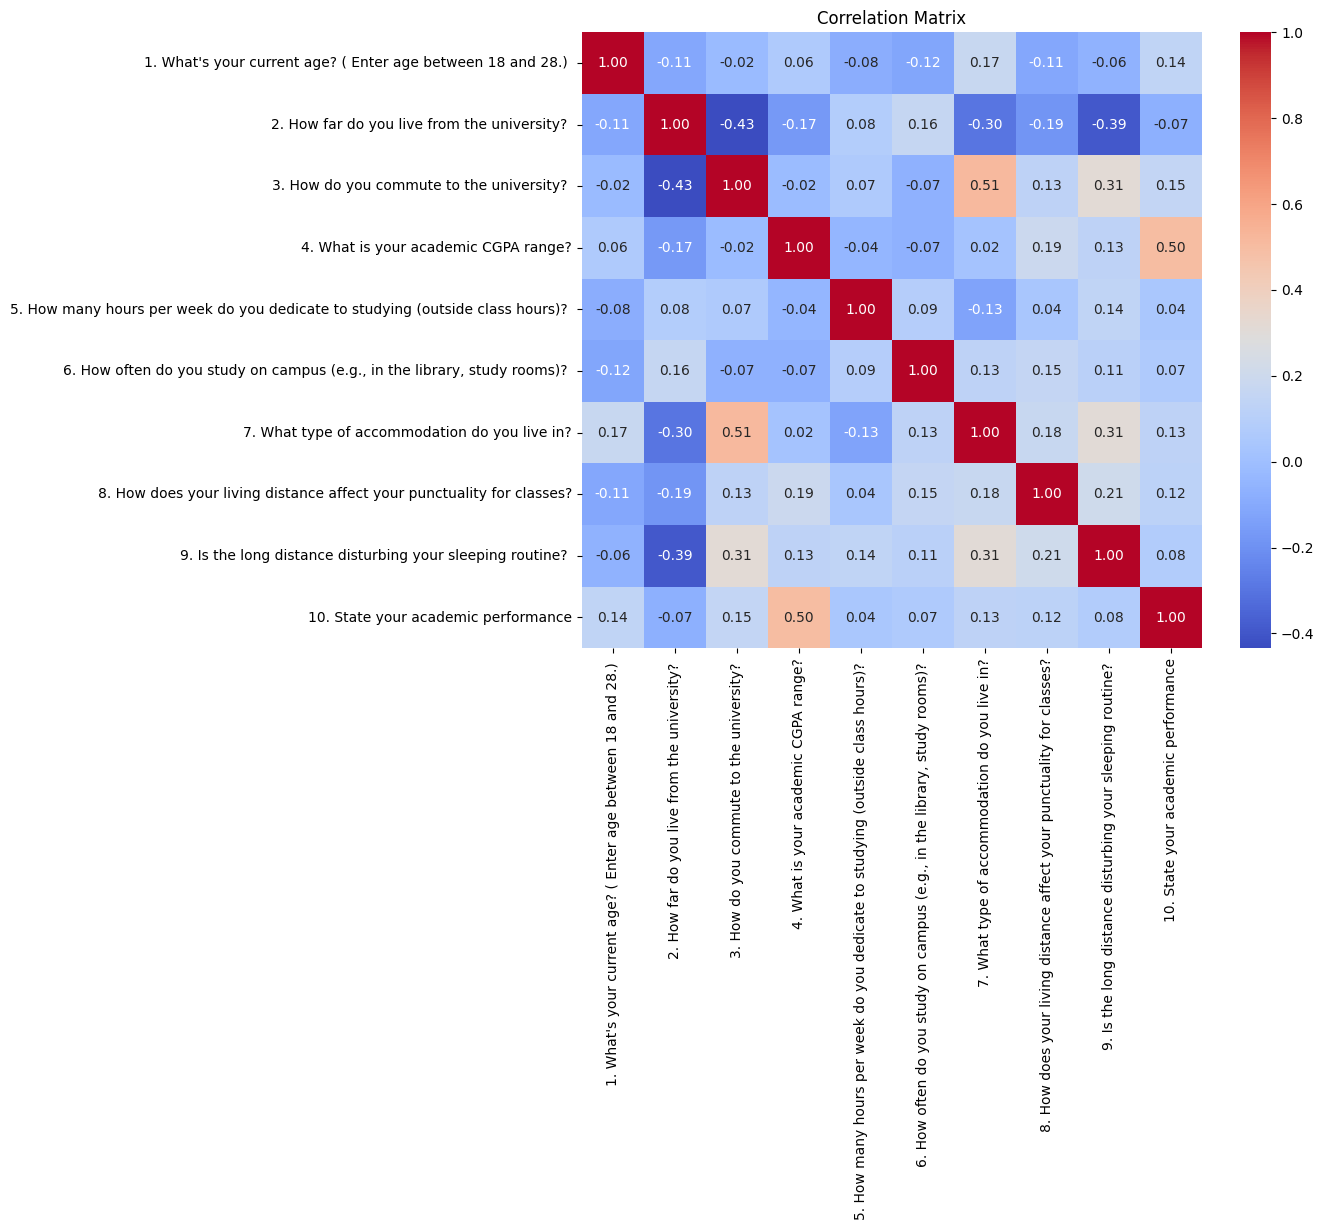

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(main1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
main1.head()


,1. What's your current age? ( Enter age between 18 and 28.),2. How far do you live from the university?,3. How do you commute to the university?,4. What is your academic CGPA range?,5. How many hours per week do you dedicate to studying (outside class hours)?,"6. How often do you study on campus (e.g., in the library, study rooms)?",7. What type of accommodation do you live in?,8. How does your living distance affect your punctuality for classes?,9. Is the long distance disturbing your sleeping routine?,10. State your academic performance
0,23,4,3,4,1,1,1,1,1,3
1,21,3,3,3,4,2,1,4,2,2
2,21,2,3,3,3,1,1,2,2,1
3,21,3,3,4,3,2,1,4,1,2
4,20,1,4,4,1,3,1,4,3,2


In [ ]:

main2 = main1.copy()
columns_to_drop = ['8. How does your living distance affect your punctuality for classes?','5. How many hours per week do you dedicate to studying (outside class hours)? ']
main1.drop(columns_to_drop, axis=1, inplace=True)

main1.head()




,1. What's your current age? ( Enter age between 18 and 28.),2. How far do you live from the university?,3. How do you commute to the university?,4. What is your academic CGPA range?,"6. How often do you study on campus (e.g., in the library, study rooms)?",7. What type of accommodation do you live in?,9. Is the long distance disturbing your sleeping routine?,10. State your academic performance
0,23,4,3,4,1,1,1,3
1,21,3,3,3,2,1,2,2
2,21,2,3,3,1,1,2,1
3,21,3,3,4,2,1,1,2
4,20,1,4,4,3,1,3,2


In [ ]:

columns_to_drop = ["1. What's your current age? ( Enter age between 18 and 28.) ",'6. How often do you study on campus (e.g., in the library, study rooms)? ','5. How many hours per week do you dedicate to studying (outside class hours)? ']
main2.drop(columns_to_drop, axis=1, inplace=True)

main2.head()

,2. How far do you live from the university?,3. How do you commute to the university?,4. What is your academic CGPA range?,7. What type of accommodation do you live in?,8. How does your living distance affect your punctuality for classes?,9. Is the long distance disturbing your sleeping routine?,10. State your academic performance
0,4,3,4,1,1,1,3
1,3,3,3,1,4,2,2
2,2,3,3,1,2,2,1
3,3,3,4,1,4,1,2
4,1,4,4,1,4,3,2


In [ ]:
# Skewness and Kurtosis
skewness = main1.skew()
kurtosis = main1.kurtosis()

print("Skewness of the dataset:")
print(skewness)

print("\nKurtosis of the dataset:")
print(kurtosis)


Skewness of the dataset:
1. What's your current age? ( Enter age between 18 and 28.)                 -0.499008
2. How far do you live from the university?                                 -0.195120
3. How do you commute to the university?                                    -0.613132
4. What is your academic CGPA range?                                        -0.479007
6. How often do you study on campus (e.g., in the library, study rooms)?     0.469394
7. What type of accommodation do you live in?                                1.425796
9. Is the long distance disturbing your sleeping routine?                    0.446847
10. State your academic performance                                         -0.000913
dtype: float64

Kurtosis of the dataset:
1. What's your current age? ( Enter age between 18 and 28.)                 -0.524493
2. How far do you live from the university?                                 -1.310243
3. How do you commute to the university?                                  

# **# Null Hypothesis:** Living close to the university has no impact on academic performance.

# **# Alternative Hypothesis:** Living close to the university has a significant impact on academic performance.

# T- Test

In [ ]:
import pandas as pd

# Assuming your original dataset is named `main`
# Select 25 random rows from the dataset
sampled_dataset = main2.sample(n=25, random_state=42)  # Use random_state for reproducibility

# Display the sampled dataset
sampled_dataset.head()

# Optionally, save the sampled dataset to a new file



,2. How far do you live from the university?,3. How do you commute to the university?,4. What is your academic CGPA range?,7. What type of accommodation do you live in?,8. How does your living distance affect your punctuality for classes?,9. Is the long distance disturbing your sleeping routine?,10. State your academic performance
127,2,3,4,1,4,1,2
66,4,1,4,1,4,1,2
104,3,4,1,2,4,3,2
19,2,2,2,1,4,2,2
42,4,3,4,3,4,1,3


In [ ]:

living_distance_column = "2. How far do you live from the university? "
academic_performance_column = "10. State your academic performance"

correlation = sampled_dataset[living_distance_column].corr(sampled_dataset[academic_performance_column])

print(f"The Pearson correlation coefficient between living distance and academic performance is: {correlation}")


The Pearson correlation coefficient between living distance and academic performance is: 0.14430347315088207


In [ ]:
import scipy.stats as stats


# Calculate the number of data points (n)
n = len(sampled_dataset)
r = correlation

# Calculate the t-statistic
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)

# Degrees of freedom
df_t = n - 2

# Get the p-value from the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df_t))

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Determine if the result is significant
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("Reject the null hypothesis:  There is a significant relationship between living distance and academic performance.")
else:
    print("Fail to reject the null hypothesis:  There is no significant relationship between living distance and academic performance.")

t-statistic: 0.6993751698056656
p-value: 0.49133071067592016
Fail to reject the null hypothesis:  There is no significant relationship between living distance and academic performance.


# Chi- Square Test

In [ ]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(main2[living_distance_column], main2[academic_performance_column])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies table:\n{expected}")

# Determine if the result is significant
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("Reject the null hypothesis:  There is a significant relationship between living distance and academic performance.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between living distance and academic performance.")


Chi-Square Statistic: 10.529625400191687
p-value: 0.10404803676367688
Degrees of Freedom: 6
Expected frequencies table:
[[ 4.32835821 19.26119403  5.41044776]
 [ 4.32835821 19.26119403  5.41044776]
 [ 5.67164179 25.23880597  7.08955224]
 [ 5.67164179 25.23880597  7.08955224]]
Fail to reject the null hypothesis: There is no significant relationship between living distance and academic performance.


In [ ]:
print(contingency_table)

10. State your academic performance           1   2   3
2. How far do you live from the university?            
1                                             6  13  10
2                                             4  22   3
3                                             3  29   6
4                                             7  25   6


# Anova Test

In [ ]:
import pandas as pd
import scipy.stats as stats

# Example: Assuming 'df' is your dataset
# Replace 'How far do you live from the university?' and 'State your academic performance' with actual column names.

# Create groups based on distance thresholds
def categorize_distance(distance):
    if distance <= 2:  # Example: Define "Very Near"
        return 'Very Near'
    elif distance <= 5:  # Define "Near"
        return 'Near'
    elif distance <= 10:  # Define "Moderate Distance"
        return 'Moderate Distance'
    else:  # Define "Far"
        return 'Far'

# Apply the categorization function
main2['DistanceCategory'] = main2["2. How far do you live from the university? "].apply(categorize_distance)

# Drop missing values
main2 = main2.dropna(subset=['DistanceCategory', "10. State your academic performance"])

# Split into groups for ANOVA
groups = [group["10. State your academic performance"].values for _, group in main2.groupby('DistanceCategory')]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Print results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")


F-statistic: 0.06258370028667869
P-value: 0.8028468711449919
Fail to reject the null hypothesis: No significant difference between the groups.
